In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [236]:
# for ML 1-understand the problem statement 2-data requirement and data collection 3-data understanding 4-data preparation 5-modeling


In [237]:
df=pd.read_csv("titanic-training-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [239]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
df.shape

(891, 12)

In [241]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [242]:
median1=df["Age"].median()
median1

28.0

In [243]:
df["Age"]=df["Age"].replace(np.nan,median1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:
mode1=df["Embarked"].mode()[0]
mode1

'S'

In [245]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)
df.isnull().sum()
# we r not supposed to do this with cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [246]:
#drop insignificant columns

In [247]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [248]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [249]:
# let check for duplicate
duplicate=df.duplicated()
print(duplicate.sum())

116


In [250]:
# lets check whether there are outliers or not

<Axes: xlabel='Age'>

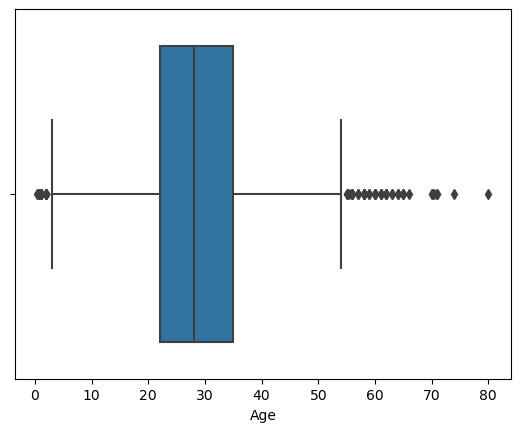

In [251]:
sns.boxplot(x="Age",data=df)

In [252]:
# let remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [253]:
lowAge,uppAge=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uppAge,uppAge,df['Age'])
df['Age']=np.where(df['Age']<lowAge,lowAge,df['Age'])


<Axes: xlabel='Age'>

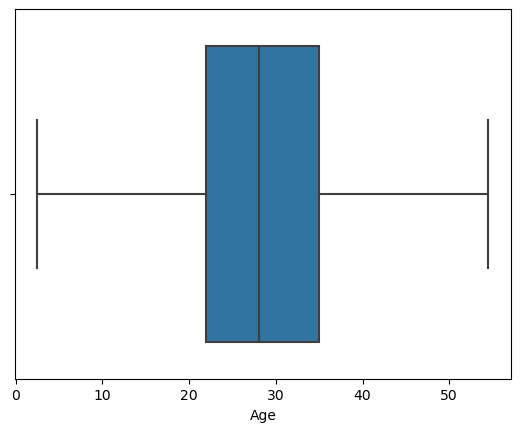

In [254]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='Fare'>

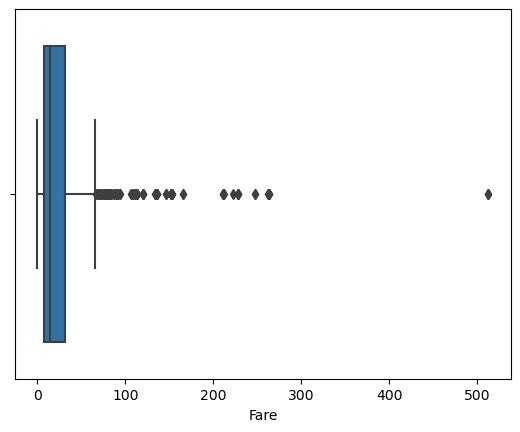

In [255]:
#  now for above there are no outliers
sns.boxplot(x="Fare",data=df)

In [256]:
lowFare,uppFare=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>uppAge,uppAge,df['Fare'])
df['Fare']=np.where(df['Fare']<lowAge,lowAge,df['Fare'])


<Axes: xlabel='Fare'>

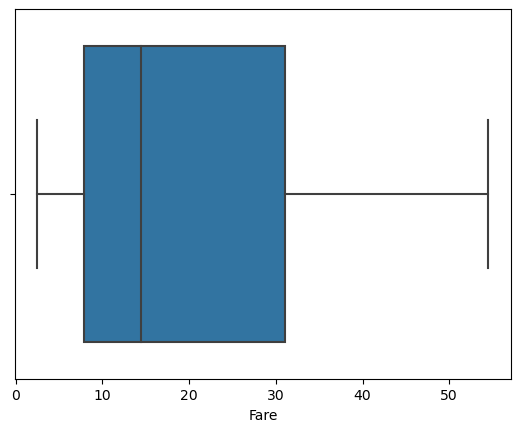

In [257]:
sns.boxplot(x="Fare",data=df)

In [258]:
## encoding

In [259]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [260]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,54.500,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [261]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [262]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.250,False,True,False,False,True
1,1,1,38.0,1,0,54.500,True,False,True,False,False
2,1,3,26.0,0,0,7.925,True,False,False,False,True
3,1,1,35.0,1,0,53.100,True,False,False,False,True
4,0,3,35.0,0,0,8.050,False,True,False,False,True


## dataset2 auto mg

In [263]:
df=pd.read_csv("auto-mpg.csv")

In [264]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [265]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [266]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [267]:
df.shape

(398, 9)

In [268]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [272]:
df['horsepower']=df['horsepower'].replace(to_replace='?',value=np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [273]:
median1=df["horsepower"].median()
median1

93.5

In [278]:
df["horsepower"]=df["horsepower"].replace(np.nan,median1) ## do not replace it with mode only mean and median

In [279]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [280]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<Axes: xlabel='horsepower'>

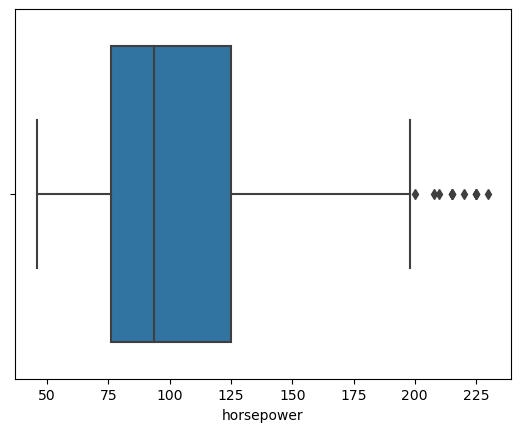

In [283]:
duplicate=df.duplicated()
print(duplicate.sum())

0


In [284]:
df=df.drop(["car name"],axis=1)

In [285]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [286]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [288]:
df=pd.get_dummies(df,columns=["origin"])

In [289]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
185,26.0,4,98.0,79.0,2255,17.7,76,True,False,False
156,16.0,8,400.0,170.0,4668,11.5,75,True,False,False
350,34.7,4,105.0,63.0,2215,14.9,81,True,False,False
288,18.2,8,318.0,135.0,3830,15.2,79,True,False,False
279,29.5,4,98.0,68.0,2135,16.6,78,False,False,True
157,15.0,8,350.0,145.0,4440,14.0,75,True,False,False
176,19.0,6,232.0,90.0,3211,17.0,75,True,False,False
80,22.0,4,122.0,86.0,2395,16.0,72,True,False,False
200,18.0,6,250.0,78.0,3574,21.0,76,True,False,False
50,28.0,4,116.0,90.0,2123,14.0,71,False,True,False


#### model

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [294]:
Y=df[["mpg"]]
X=df.drop(["mpg"],axis=1)

In [296]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [297]:
model_lr=LinearRegression()

In [298]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [308]:
model_lr.score(X_train,Y_train)

0.603148754063023

In [309]:
model_lr.score(X_test,Y_test)

0.6339136715208276